# Qiskit from Scratch
## Austin Python Meetup
### Tuesday, April 16, 2019

## Installation & Set Up
Only needs doing once

### install packages

In [1]:
#%pip install qiskit-aqua qiskit

## Build first circuit

We will build a circuit to prepare the Bell state
, the "Hello World" of quantum computing.
It is the simplest demonstration combining the 2 core quantum phenamena: superposition & entanglement

quantum programs == quantum circuits (unless doing quantum annealing ie D-Wave)

In [2]:
from qiskit.visualization import iplot_histogram, plot_histogram
%pylab inline
import qiskit as qk

Populating the interactive namespace from numpy and matplotlib


### Allocate a circuit with 2 qubits and 2 classical bits.

In [3]:
qr = qk.QuantumRegister(2)
cr = qk.ClassicalRegister(2)
qc = qk.QuantumCircuit(qr,cr)

### Add Hadamard gate to put first qubit in superposition

In [4]:
qc.h(qr[0])

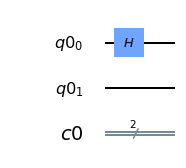

In [5]:
qc.draw(output='mpl')

### Add Contolled-Not gate to entangle qubits

In [6]:
qc.cx(qr[0], qr[1])

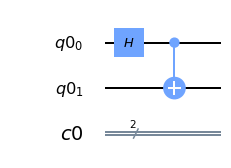

In [7]:
qc.draw(output='mpl')

### Add measurerement of both qubits

In [8]:
qc.measure(qr,cr)

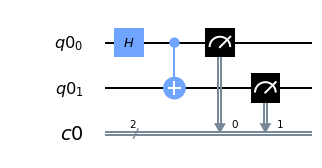

In [9]:
qc.draw(output='mpl')

## Simulate circuit classically

In [10]:
qk.Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

In [11]:
sim = qk.Aer.get_backend('qasm_simulator')

In [12]:
res = qk.execute(qc, sim).result()

In [13]:
res

Result(backend_name='qasm_simulator', backend_version='0.3.4', date=datetime.datetime(2020, 1, 24, 19, 4, 2, 580864), header=Obj(backend_name='qasm_simulator', backend_version='0.3.4'), job_id='be3215e4-74de-481e-b5f4-0d6ff00d81c0', metadata={'max_memory_mb': 7848, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0016677240000000002}, qobj_id='97674d28-10ad-4864-8d2b-2134c719f507', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=523, 0x3=501)), header=Obj(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], memory_slots=2, n_qubits=2, name='circuit0', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=2507214890, shots=1024, status='DONE', success=True, time_taken=0.00158157)], status='COMPLETED', success=True, time_taken=0.00635218620300293)

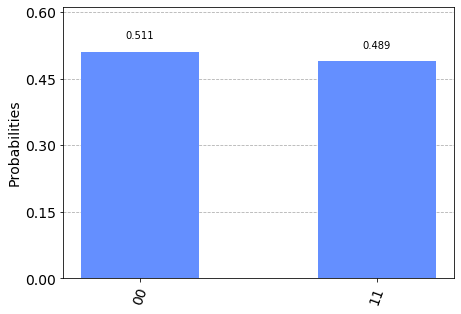

In [14]:
plot_histogram(res.get_counts())

## Run circuit on real quantum computer

### obtain API token

https://quantumexperience.ng.bluemix.net/qx/account/advanced

### save API token 

In [15]:
from qiskit import IBMQ
IBMQ.delete_account()
IBMQ.save_account('4fd56...',
                  overwrite=True) # the token you obtained above
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### Available processors

In [16]:
provider = IBMQ.get_provider()
procs=provider.backends(operational=True, simulator=False)
procs

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [17]:
from qiskit.tools.jupyter import *
%qiskit_backend_overview

/home/dm/anaconda3/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:367: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


### Choose a processor

In [18]:
from qiskit.tools import monitor
backend = qk.providers.ibmq.least_busy([p for p in procs if len(p.properties().qubits) >= 2])
#%qiskit_backend_monitor backend

In [19]:
from qiskit.tools.monitor import backend_overview, backend_monitor
backend_monitor(backend)

ibmqx2
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 0
    backend_version: 2.0.2
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    url: None
    max_experiments: 75
    n_registers: 1
    credits_required: True
    open_pulse: False
    allow_object_storage: True
    allow_q_object: True
    allow_q_circuit: False
    description: 5 qubit device
    sample_name: sparrow
    online_date: 2017-01-24T05:00:00+00:00
    max_shots: 8192
    memory: True
    quantum_volume: 8
    conditional: False
    backend_name: ibmqx2
    coupling_map: [[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]]

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 5.28628 GHz / 54.07468 µs / 70.34927 µs / 0.0 / 0.00066 / 0.00132 / 0.0145
    Q1 / 5.23791 GHz / 63.10015

### Submit job

In [20]:
#%%qiskit_job_status
#%%qiskit_progress_bar
%time job = qk.execute(qc, backend=backend, shots=2**10)
#mon = monitor.job_monitor(job)


CPU times: user 119 ms, sys: 10.7 ms, total: 129 ms
Wall time: 1.37 s


### Get results

In [21]:
%time res2 = job.result()

CPU times: user 159 ms, sys: 9.67 ms, total: 169 ms
Wall time: 13.6 s


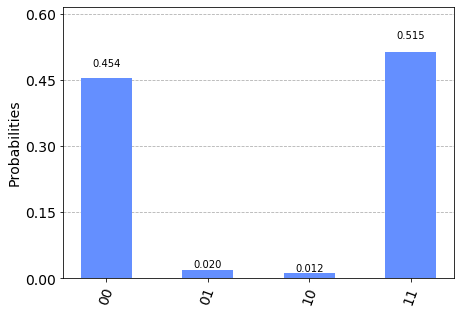

In [22]:
plot_histogram(res2.get_counts(qc))

In [23]:
res2.get_counts(qc)

{'10': 12, '00': 465, '01': 20, '11': 527}

## What next?

### Repos
- https://github.com/Qiskit
  - https://github.com/Qiskit/qiskit-tutorials
  - https://github.com/Qiskit/qiskit-presentations
- https://github.com/jaygambetta
- https://github.com/JavaFXpert
- https://github.com/decodoku
- https://github.com/xanaduai
- https://github.com/artix41/awesome-quantum-ml
- https://github.com/desireevl/awesome-quantum-computing

### Blogs
- https://medium.com/@qiskit
- https://medium.com/rigetti
  - https://medium.com/rigetti/jamming-with-a-quantum-computer-bed05550a0e8
- https://medium.com/xanaduai
- https://medium.com/@decodoku
- https://ai.google/research/teams/applied-science/quantum-ai

### Videos
#### The very basics
- https://www.youtube.com/watch?v=ZoT82NDpcvQ
- https://youtu.be/F8U1d2Hqark?t=352 (only the second half)

#### More in depth
- http://quiprocone.org/Protected/DD_lectures.htm
- https://www.youtube.com/watch?v=F_Riqjdh2oM
- https://www.youtube.com/watch?v=LSA3pYZtRGg
- https://www.youtube.com/watch?v=UgqLi1itWmk

#### EdX/MIT Quantum Machine learning course
- https://www.edx.org/course/quantum-machine-learning
- https://gitlab.com/qosf/qml-mooc.git

#### More resources
- https://github.com/desireevl/awesome-quantum-computing
- https://github.com/qosf/awesome-quantum-software
- https://github.com/krishnakumarsekar/awesome-quantum-machine-learning
- https://github.com/artix41/awesome-quantum-ml
- https://github.com/hsavit1/Awesome-Quantum-Computation